In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing, svm, tree, cross_validation, metrics
import sklearn.ensemble as ske
import tensorflow as tf
import tensorflow.contrib.learn as skflow
import tensorflow.contrib.layers as layers

In [113]:
import scipy.stats as stats
from matplotlib.legend_handler import HandlerLine2D

Importamos la libreria grafica de matplotlib, pyplot para poder graficar datos tanto de exploración (estadística descriptiva) como de resultados. El comando matplotlib inline indica que se graficara en el notebook
importamos la libreria de variables aleatorias, numpy para operaciones matemáticas entre vectores y matrices, pandas para el manejo de datos en tablas indexadas, sklearn nos provee de herramientas para obtener los datos, preprocesarlos, entrenarlos, validarlos y medirlos en ese orden. Los ensambles son tipos de aprendizaje maquina.
Tensorflow es la libreria openSource de Google para computación numérica y contrib.learn es una interfaz que ayuda a manejar facilmente los datos y realizar Predicciones y Mineria de Datos.

In [7]:
iris_df = pd.read_csv('data.csv',header = None, index_col=None, na_values=['NA'] )
iris_df.columns = ['sepal_len','sepal_width','petal_len','petal_width','class']

In [8]:
iris_df.head(5)

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Leemos los datos y los guardamos en un dataFrame

In [15]:
iris_byclass_df = iris_df.groupby('class')

In [16]:
iris_byclass_df.mean()

,sepal_len,sepal_width,petal_len,petal_width
class,,,,
Iris-setosa,5.006,3.428,1.462,0.246
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Agrupamos segun su clase y obtenemos la media de cada columna por clase, podemos ver que sus valores son muy distintivos por cada clase

In [17]:
iris_byclass_df.describe()

petal_len  petal_width  sepal_len  sepal_width
class                                                                
Iris-setosa     count  50.000000    50.000000  50.000000    50.000000
                mean    1.462000     0.246000   5.006000     3.428000
                std     0.173664     0.105386   0.352490     0.379064
                min     1.000000     0.100000   4.300000     2.300000
                25%     1.400000     0.200000   4.800000     3.200000
                50%     1.500000     0.200000   5.000000     3.400000
                75%     1.575000     0.300000   5.200000     3.675000
                max     1.900000     0.600000   5.800000     4.400000
Iris-versicolor count  50.000000    50.000000  50.000000    50.000000
                mean    4.260000     1.326000   5.936000     2.770000
                std     0.469911     0.197753   0.516171     0.313798
                min     3.000000     1.000000   4.900000     2.000000
                25%     4.000000     1.200000   5.600000     2.525000
                50%     4.350000     1.300000   5.900000     2.800000
                75%     4.600000     1.500000   6.300000     3.000000
                max     5.100000     1.800000   7.000000     3.400000
Iris-virginica  count  50.000000    50.000000  50.000000    50.000000
                mean    5.552000     2.026000   6.588000     2.974000
                std     0.551895     0.274650   0.635880     0.322497
                min     4.500000     1.400000   4.900000     2.200000
                25%     5.100000     1.800000   6.225000     2.800000
                50%     5.550000     2.000000   6.500000     3.000000
                75%     5.875000     2.300000   6.900000     3.175000
                max     6.900000     2.500000   7.900000     3.800000

Con la funcion 'describe' podemos observar los detalles de las columnas numericas, como la cantidad de valores, su media, su desviación estandard y sus quintiles (recuerden, 50% no es media, es mediana)

In [32]:
iris_byclass_df.describe().loc['Iris-setosa']

,petal_len,petal_width,sepal_len,sepal_width
count,50.000000,50.000000,50.00000,50.000000
mean,1.462000,0.246000,5.00600,3.428000
std,0.173664,0.105386,0.35249,0.379064
min,1.000000,0.100000,4.30000,2.300000
25%,1.400000,0.200000,4.80000,3.200000
50%,1.500000,0.200000,5.00000,3.400000
75%,1.575000,0.300000,5.20000,3.675000
max,1.900000,0.600000,5.80000,4.400000


In [34]:
iris_byclass_df.describe().loc['Iris-versicolor']

,petal_len,petal_width,sepal_len,sepal_width
count,50.000000,50.000000,50.000000,50.000000
mean,4.260000,1.326000,5.936000,2.770000
std,0.469911,0.197753,0.516171,0.313798
min,3.000000,1.000000,4.900000,2.000000
25%,4.000000,1.200000,5.600000,2.525000
50%,4.350000,1.300000,5.900000,2.800000
75%,4.600000,1.500000,6.300000,3.000000
max,5.100000,1.800000,7.000000,3.400000


In [35]:
iris_byclass_df.describe().loc['Iris-virginica']

,petal_len,petal_width,sepal_len,sepal_width
count,50.000000,50.00000,50.00000,50.000000
mean,5.552000,2.02600,6.58800,2.974000
std,0.551895,0.27465,0.63588,0.322497
min,4.500000,1.40000,4.90000,2.200000
25%,5.100000,1.80000,6.22500,2.800000
50%,5.550000,2.00000,6.50000,3.000000
75%,5.875000,2.30000,6.90000,3.175000
max,6.900000,2.50000,7.90000,3.800000


haciendo uso de las funciones indexadoras .loc[] y .iloc[] podemos obtener unicamente aquellas subtablas o registros que coincidan con el nombre, en el caso de loc[], y con su posicion en el caso de iloc[]

In [44]:
means = iris_byclass_df.mean()
iris_byclass_df.mean()

,sepal_len,sepal_width,petal_len,petal_width
class,,,,
Iris-setosa,5.006,3.428,1.462,0.246
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [45]:
stds= iris_byclass_df.std()
iris_byclass_df.std()

,sepal_len,sepal_width,petal_len,petal_width
class,,,,
Iris-setosa,0.352490,0.379064,0.173664,0.105386
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


Podemos obtener unicamente los valores de la media y la desviación estandar por cada clase agrupada con las funciones .mean() y .std()

In [59]:
mins = iris_df.min()
maxs = iris_df.max()

In [109]:
setosa = iris_df[iris_df['class']=='Iris-setosa']
versicolor = iris_df[iris_df['class']=='Iris-versicolor']
virginica = iris_df[iris_df['class']=='Iris-virginica']

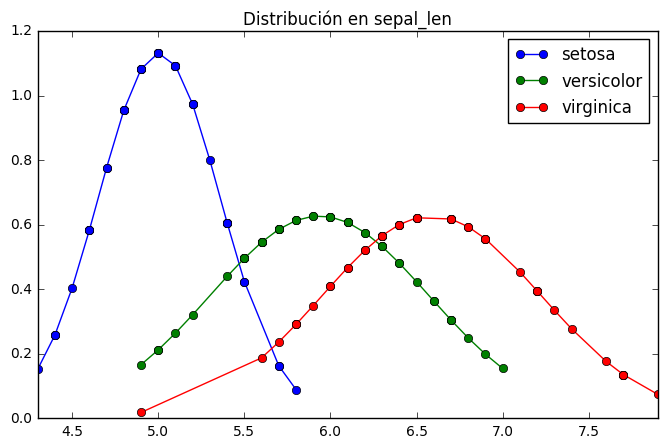

In [130]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xlim(mins[0],maxs[0])
#--------------------------------------------------------
setosa.sepal_len.values.sort()
fit = stats.norm.pdf(setosa.sepal_len,means.iloc[0][0],stds.iloc[0][0])
l1, = ax.plot(setosa.sepal_len,fit,'-o',label='setosa')
#-----------------------------------------------------
versicolor.sepal_len.values.sort()
fit = stats.norm.pdf(versicolor.sepal_len,means.iloc[1][0],stds.iloc[2][0])
l2, = ax.plot(versicolor.sepal_len,fit,'-o',label='versicolor')
#--------------------------------------------------------
virginica.sepal_len.values.sort()
fit = stats.norm.pdf(virginica.sepal_len,means.iloc[2][0],stds.iloc[2][0])
l3, = ax.plot(virginica.sepal_len,fit,'-o',label='virginica')
#--------------------------------------------------------
ax.set_title('Distribución en sepal_len')
ax.legend(handles=[l1,l2,l3])

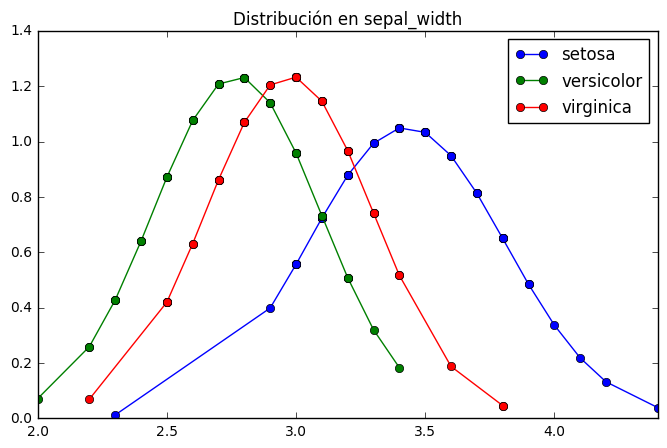

In [137]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xlim(mins[1],maxs[1])
#--------------------------------------------------------
setosa.sepal_width.values.sort()
fit = stats.norm.pdf(setosa.sepal_width,means.iloc[0][1],stds.iloc[0][1])
l1, = ax.plot(setosa.sepal_width,fit,'-o',label='setosa')
#-----------------------------------------------------
versicolor.sepal_width.values.sort()
fit = stats.norm.pdf(versicolor.sepal_width,means.iloc[1][1],stds.iloc[2][1])
l2, = ax.plot(versicolor.sepal_width,fit,'-o',label='versicolor')
#--------------------------------------------------------
virginica.sepal_width.values.sort()
fit = stats.norm.pdf(virginica.sepal_width,means.iloc[2][1],stds.iloc[2][1])
l3, = ax.plot(virginica.sepal_width,fit,'-o',label='virginica')
#--------------------------------------------------------
ax.set_title('Distribución en sepal_width')
ax.legend(handles=[l1,l2,l3])

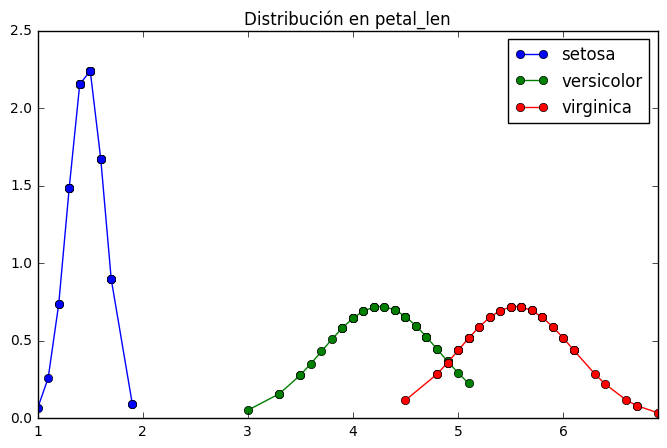

In [147]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xlim(mins[2],maxs[2])
#--------------------------------------------------------
setosa.petal_len.values.sort()
fit = stats.norm.pdf(setosa.petal_len,means.iloc[0][2],stds.iloc[0][2])
l1, = ax.plot(setosa.petal_len,fit,'-o',label='setosa')
#-----------------------------------------------------
versicolor.petal_len.values.sort()
fit = stats.norm.pdf(versicolor.petal_len,means.iloc[1][2],stds.iloc[2][2])
l2, = ax.plot(versicolor.petal_len,fit,'-o',label='versicolor')
#--------------------------------------------------------
virginica.petal_len.values.sort()
fit = stats.norm.pdf(virginica.petal_len,means.iloc[2][2],stds.iloc[2][2])
l3, = ax.plot(virginica.petal_len,fit,'-o',label='virginica')
#--------------------------------------------------------
ax.set_title('Distribución en petal_len')
ax.legend(handles=[l1,l2,l3])

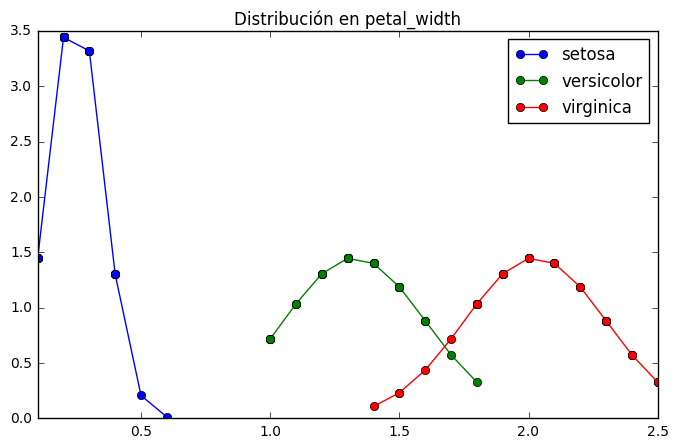

In [149]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xlim(mins[3],maxs[3])
#--------------------------------------------------------
setosa.petal_width.values.sort()
fit = stats.norm.pdf(setosa.petal_width,means.iloc[0][3],stds.iloc[0][3])
l1, = ax.plot(setosa.petal_width,fit,'-o',label='setosa')
#-----------------------------------------------------
versicolor.petal_width.values.sort()
fit = stats.norm.pdf(versicolor.petal_width,means.iloc[1][3],stds.iloc[2][3])
l2, = ax.plot(versicolor.petal_width,fit,'-o',label='versicolor')
#--------------------------------------------------------
virginica.petal_width.values.sort()
fit = stats.norm.pdf(virginica.petal_width,means.iloc[2][3],stds.iloc[2][3])
l3, = ax.plot(virginica.petal_width,fit,'-o',label='virginica')
#--------------------------------------------------------
ax.set_title('Distribución en petal_width')
ax.legend(handles=[l1,l2,l3])

Con los anteriores ploteos de sus distribuciones normales, podemos observar que existen diferencias (al menos) visibles, pero para la mayoria de los campos estás son lo suficientemente marcadas para diferenciar una clase de otra.
No es recomendable hacer este tipo de análisis visual, o al menos usar herramientas más sofisticadas, ya que es suele ser muy tardado.

## Aplicando Machine Learning con Scykit Learn

In [49]:
distribution = stats.norm(means.iloc[0][0],stds.iloc[0][0])

In [50]:
plt.hist.plot()

TypeError: pdf() missing 1 required positional argument: 'x'